Tugas Pemodelan & Optimasi : Simple RegresiLinear


Nama : Oka Mialtra

NIM : 2301222037

In [1]:
# Setup setting terkait dengan plotting
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt    # import package untuk plotting
from matplotlib import rcParams    # runtime configuration (rc)
rcParams['figure.figsize']    = (14,7)   # untuk membuat visualisasi lebih baik, modif parameter dibawah ini
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

import time

In [2]:
# mendefinisikan SIMPLE LINEAR REGRESSION
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

Mendefinisikan contoh data.
Data dibaca menggunakan pandas library.

In [3]:
import pandas as pd
start_import = time.time()


sample_data=pd.read_csv("Linear_Regression_sample.csv")
sample_data.head()
end_import = time.time()


In [4]:
start_generate_data = time.time()
X = sample_data["Value"]
y = sample_data["Value"]* np.random.rand(len(X))
end_generate_data = time.time()

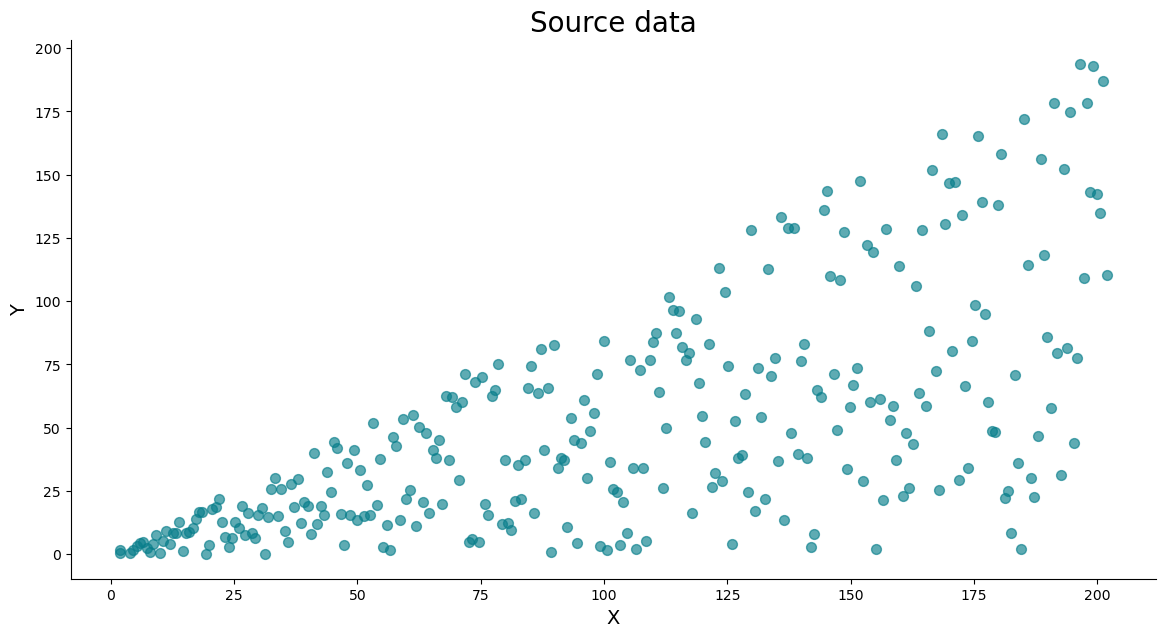

In [5]:
# plotting data
plt.scatter(X, y, s=50, c='#087E8B', alpha=0.65) # s=ukuranMarker, c=color, alpha=transparency
plt.title('Source data', size=20)                 # size= ukuran font
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [6]:
# for validation, we split between training data and testing data
# use sklearn package
from sklearn.model_selection import train_test_split
start_training_data = time.time()
# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [7]:
# Training testing process:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction
end_training_data = time.time()



In [8]:
# menampilkan coef hasil training: b0 and b1
model.b0, model.b1

(-0.21810191631398368, 0.5027993173495163)

In [9]:
# menampilkan prediction
preds.head()

203    69.782736
266    90.900308
152    52.687560
9       4.754025
233    79.838723
Name: Value, dtype: float64

In [10]:
y_test.head()

203    39.560551
266    22.080587
152    76.709857
9       0.469396
233    37.220443
Name: Value, dtype: float64

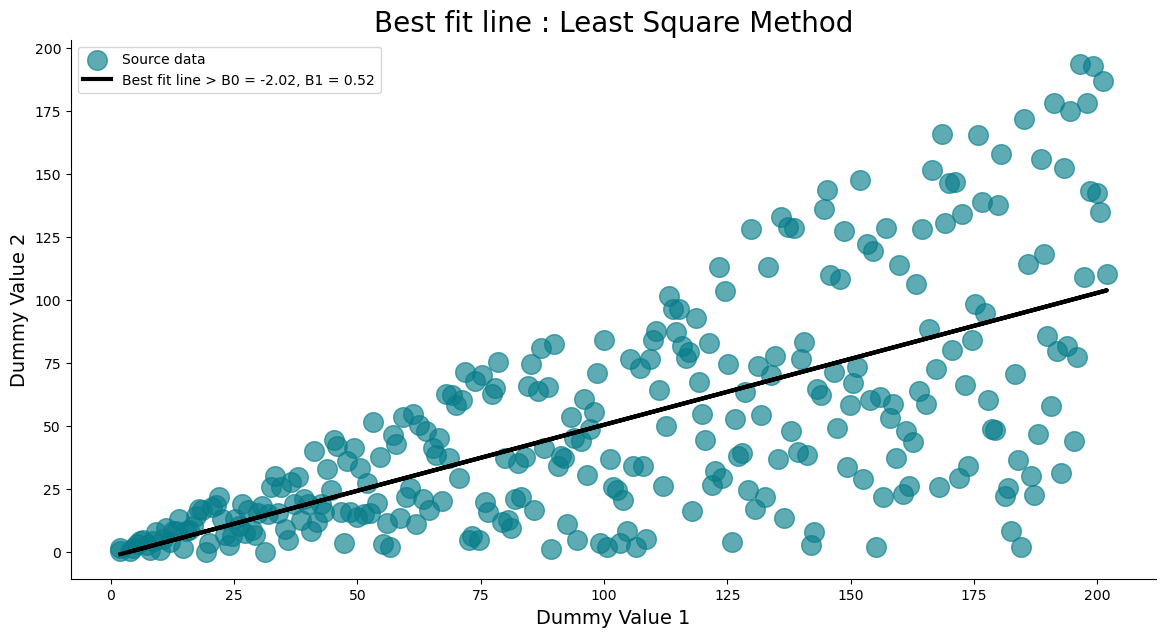

In [11]:

start_qualitative_validation = time.time()
# 1. QUALITATIVE
# Visualize the data, by using best fit line
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('Dummy Value 1', size=14)
plt.ylabel('Dummy Value 2', size=14)
plt.legend()                 # menunjukkan label
plt.show()
end_qualitative_validation = time.time()



In [12]:
# 2. QUANTITATIVE Comparison 
start_QUANTITATIVE_validation = time.time()
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))   # definisikan y sbg variable?
rmse(y_test, preds)
end_QUANTITATIVE_validation = time.time()



In [13]:
# Now we will compare with SCIKIT-LEARN: LinearRegression
start_SCIKIT_LEARN = time.time()
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(-0.21810191631398368, array([0.50279932]))

In [14]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
end_SCIKIT_LEARN = time.time()



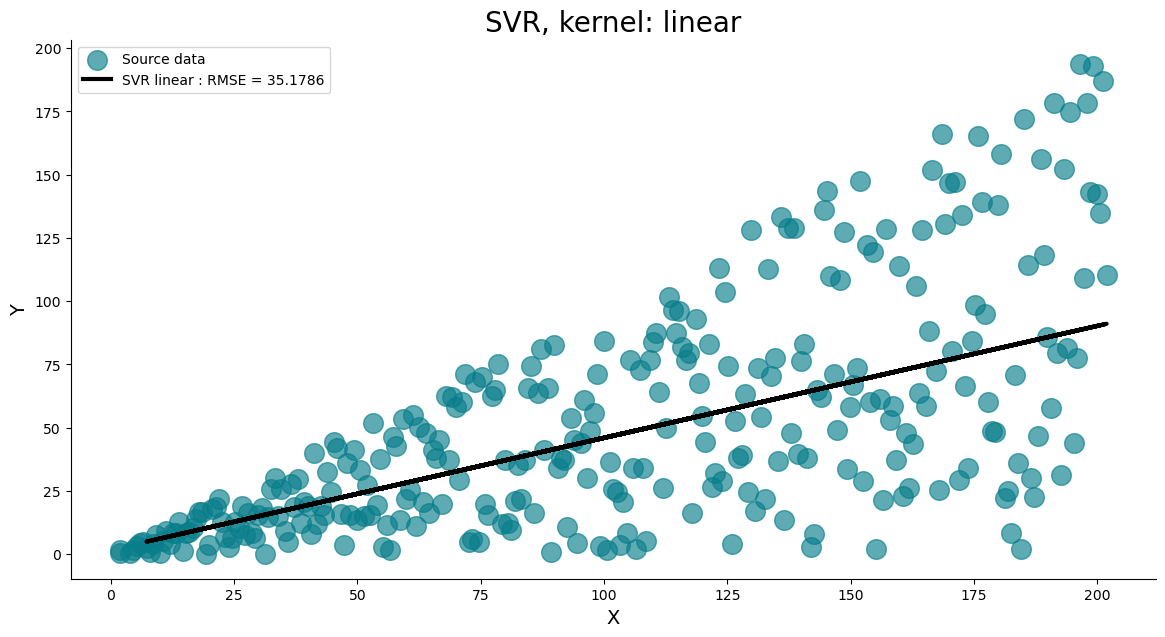

In [15]:
# Now we will playing with parameters in SVR - LINEAR
from sklearn.svm import SVR
start_svr = time.time()
# now we use linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin.fit(np.array(X_train).reshape(-1,1), y_train)        # training the model
svr_lin_preds = svr_lin.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin = rmse(y_test, svr_lin_preds)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, svr_lin_preds, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()
end_svr = time.time()

In [16]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)

35.17856216616004

Hasil performansi : 


In [17]:
importtime = end_import - start_import
generatetime = end_generate_data - start_generate_data
trainingtime = end_training_data - start_training_data
qualitativetime = end_qualitative_validation - start_qualitative_validation
QUANTITATIVEtime = end_QUANTITATIVE_validation - start_QUANTITATIVE_validation
scikittime = end_SCIKIT_LEARN - start_SCIKIT_LEARN
svrtime = end_svr - start_svr

1. Penjelasan Data yang digunakan.

    Sumber data dari file CSV dan di read menggunakan library panda. 
    File terdiri dari 2 kolom yaitu No dan Value.
    Proses pembuatan dummy data :
        1. Data X diambil dari kolom Value.
        2. Data y merupakan hasil perkalian kolom Value dengan angka random.
    

2. Hasil regresi linear dengan menggunakan least square (dapat menggunakan contoh code diatas).
   
   Dari data dummy diatas terlihat secara visual bahwa hasil prediksi memiliki perbedaan range yang bervariasi dengan data aslinya, sehingga RMSE yang didapatkan sebesar 36.7519168431777 . 


3. Analisis performansi dari penerapan metode di atas.
    

In [18]:
print(f"Waktu untuk import data yang digunakan: {importtime} detik")
print(f"Waktu untuk generate dummy data yang digunakan: {generatetime} detik")
print(f"Waktu untuk training ,dengan 20% sebagai data test: {trainingtime} detik")
print(f"Waktu untuk validasi data test dan data asli berdasar qualitative : {qualitativetime} detik")
print(f"Waktu untuk validasi data test dan data asli berdasar QUANTITATIVE : {QUANTITATIVEtime} detik")
print(f"Waktu untuk validasi menggunakan SCIKIT-LEARN: LinearRegression : {scikittime} detik")
print(f"Waktu untuk validasi dengan SVR : {svrtime} detik")

Waktu untuk import data yang digunakan: 0.004023075103759766 detik
Waktu untuk generate dummy data yang digunakan: 0.0009975433349609375 detik
Waktu untuk training ,dengan 20% sebagai data test: 0.017256498336791992 detik
Waktu untuk validasi data test dan data asli berdasar qualitative : 0.17752647399902344 detik
Waktu untuk validasi data test dan data asli berdasar QUANTITATIVE : 0.0009965896606445312 detik
Waktu untuk validasi menggunakan SCIKIT-LEARN: LinearRegression : 0.04487776756286621 detik
Waktu untuk validasi dengan SVR : 1.0303821563720703 detik


Semakin banyak data, maka akan berbanding lurus dengan waktu pemrosesan dan validasi.